## Task 2.1 (continuation)

Different approch to the precribed was taken. With the used of json lib the normalization and data <br>
organization was manage in a different .ipynb file, here is the continuation. On the next cell we are <br>
loading the data and median values obtained

In [1]:
#import useful packages
import json # Package for loading data
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# ====================================================
# Task 2.1 is on a separate .ipynb file. This section 
# is for loading the json files with the corresponding
# pre-process data
# ====================================================
# Load normalized data for xdata, ydata, and median values
with open("n_xdata.json", "r") as xdata_file:
    n_xdata_dict = json.load(xdata_file)
with open("n_ydata.json", "r") as ydata_file:
    n_ydata_dict = json.load(ydata_file)    
with open("x_medians.json", "r") as x_medians_file:
    x_medians_dict = json.load(x_medians_file)    
with open("y_medians.json", "r") as y_medians_file:
    y_medians_dict = json.load(y_medians_file)
    
# Access the data from the dictionaries
xdata = n_xdata_dict["data"]
ydata = n_ydata_dict["data"]
x_medians = x_medians_dict["data"]
y_medians = y_medians_dict["data"]

# Assign meadian values of input variables
Tmed = x_medians[0]
gamed = x_medians[1]
qsmed = x_medians[2]

# Assign meadian values of output variables
almed = y_medians[0]
efmed = y_medians[1]

# T1 [Kelvins], gamma, Qs [kW]:
xarray = np.array(xdata)
# Alpha, EffSys:
yarray = np.array(ydata)

# Print data for verification
# print(xdata)
# print(xarray)
# print(ydata)
# print(yarray)

# Define inputs & outputs for Keras model
data_inputs = np.array(xdata)
data_outputs = np.array(ydata)


## Task 2.2 (a)

In the second cell of the code in file CodeP2.4F23.ipynb, create a sequential neural network:

1. with three input variables (input_shape=[3]) in the first (hidden) dense layer of the network list.  
2. Initially set the number of neurons to 4 in this layer and set the activation function to ‘K.relu.’  
3. Then add two more hidden dense layers: <br>
3.1. the second hidden layer of the network with 8 neurons <br>
3.2. the third hidden dense layer with 4 neurons.  <br>
3.3. In both of these layers, set the activation function to ‘K.relu’.  
4. Finally, add one more output dense layer with 2 neurons (one for each output) and do not specify an activation function for the output layer. <br>
When you are finished, the list of layers in your sequential network should have 4, 8, 4, and 2 
neurons.  
5. In cell 2, set the initializer limits to minval = -0.9, maxval = 0.9.  
6. Run the first and second cells of the modified CodeP2.4F23.ipynb code.  

You should get no error messages after the second cell if things are in order.

In [2]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.9, maxval= 0.9)

model = keras.Sequential([
    keras.layers.Dense(4, activation=K.relu, input_shape=[3], kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.relu, kernel_initializer=initializer),
    keras.layers.Dense(4, activation=K.relu, kernel_initializer=initializer),
    keras.layers.Dense(2, kernel_initializer=initializer)
  ])
'''in Task 2.2, add 3rd layer to network with 4 neurons and activation = K.relu'''
#Print summary of model features
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


/Users/danieljgarciam/anaconda3/envs/Python3-8_Kera_env/lib/python3.8/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


## Task 2.2 (b)

1. In the third cell, just change the learning parameter to 0.001, and run that cell to check 
that no error message appears. 

In [3]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers. Argument to RMSprop is learning parameter.
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


## Task 2.2 (b)

2. In the fourth cell, set epochs equal to 600.  
3. Then run the first four cells in sequence.  

Note that this network should be trained using the normalized data 
output from Task 2.1.  The fourth cell will train the network by successive forward passes 
for each point in the data set, and a backpropagation pass to update the weights and biases at 
the end of each epoch.  For each epoch, the reported loss value indicates the mean absolute 
error.  Since our normalized parameters make the data values of order 1, we want to achieve 
a value of mean absolute error that is small (a few percent) of one (~0.05 or less). 
 
Note you can run cell 4 repeated times, and each time it will begin with the constants from the 
last epoch in the previous run, so this is a way to extending the number of epochs to try to further 
reduce the mean absolute error.  If you go back and start with cell 1, it starts over completely.  
Run cell 4 repeated times and try to get as low a loss value as possible (below 0.04 if possible).  
Report the resulting lowest loss value in your written summary

In [16]:
# After the compilation of the model, we’ll use the fit method with 500 epochs.
# I started with epochs value of 100 and then tested the model after training. 
# The prediction was not that good. Then I modified the number of epochs to 200 
# and tested the model again. 
# Accuracy had improved slightly, but figured I’d give it one more try. Finally,  
# at 500 epochs I found acceptable prediction accuracy.

# The fit method takes three parameters; namely, x, y, and number of epochs. 
# During model training, if all the batches of data are seen by the model once, 
# we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
# The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

predictions = model.predict(data_inputs)


Epoch 1/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 2/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 3/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 4/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 5/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 6/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 7/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 8/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 9/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 10/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 11/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 12/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 13/600
2/2 [==============================] - 0s 1ms/st

2/2 [==============================] - 0s 949us/step - loss: 0.0509
Epoch 104/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 105/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 106/600
2/2 [==============================] - 0s 875us/step - loss: 0.0494
Epoch 107/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 108/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 109/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 110/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 111/600
2/2 [==============================] - 0s 945us/step - loss: 0.0528
Epoch 112/600
2/2 [==============================] - 0s 943us/step - loss: 0.0494
Epoch 113/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 114/600
2/2 [==============================] - 0s 946us/step - loss: 0.0497
Epoch 115/600
2/2 [=========================

Epoch 204/600
2/2 [==============================] - 0s 851us/step - loss: 0.0513
Epoch 205/600
2/2 [==============================] - 0s 962us/step - loss: 0.0476
Epoch 206/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 207/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0501
Epoch 208/600
2/2 [==============================] - 0s 868us/step - loss: 0.0474
Epoch 209/600
2/2 [==============================] - 0s 982us/step - loss: 0.0497
Epoch 210/600
2/2 [==============================] - 0s 916us/step - loss: 0.0473
Epoch 211/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0478
Epoch 212/600
2/2 [==============================] - 0s 916us/step - loss: 0.0501
Epoch 213/600
2/2 [==============================] - 0s 870us/step - loss: 0.0520
Epoch 214/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 215/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 216/600
2/2 [=======

2/2 [==============================] - 0s 867us/step - loss: 0.0453
Epoch 305/600
2/2 [==============================] - 0s 917us/step - loss: 0.0490
Epoch 306/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 307/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0469
Epoch 308/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 309/600
2/2 [==============================] - 0s 958us/step - loss: 0.0468
Epoch 310/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 311/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 312/600
2/2 [==============================] - 0s 886us/step - loss: 0.0456
Epoch 313/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 314/600
2/2 [==============================] - 0s 906us/step - loss: 0.0468
Epoch 315/600
2/2 [==============================] - 0s 852us/step - loss: 0.0457
Epoch 316/600
2/2 [=======================

2/2 [==============================] - 0s 886us/step - loss: 0.0442
Epoch 406/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 407/600
2/2 [==============================] - 0s 918us/step - loss: 0.0432
Epoch 408/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 409/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 410/600
2/2 [==============================] - 0s 896us/step - loss: 0.0455
Epoch 411/600
2/2 [==============================] - 0s 912us/step - loss: 0.0449
Epoch 412/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 413/600
2/2 [==============================] - 0s 925us/step - loss: 0.0439
Epoch 414/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 415/600
2/2 [==============================] - 0s 884us/step - loss: 0.0474
Epoch 416/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 417/600
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 507/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 508/600
2/2 [==============================] - 0s 805us/step - loss: 0.0414
Epoch 509/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 510/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0434
Epoch 511/600
2/2 [==============================] - 0s 944us/step - loss: 0.0445
Epoch 512/600
2/2 [==============================] - 0s 964us/step - loss: 0.0412
Epoch 513/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 514/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0427
Epoch 515/600
2/2 [==============================] - 0s 886us/step - loss: 0.0428
Epoch 516/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 517/600
2/2 [==============================] - 0s 916us/step - loss: 0.0416
Epoch 518/600
2/2 [=========================

## Task 2.2 (b)

Cell 5 in the CodeP2.4F23.ipynb code provides an example of how to predict values of , and 
 for a submitted set of the input variables T1, gamma, Qs.  You can put this in a loop to compute 
predicted values of α, ηsys and  for whatever input you want.   This cell also creates a plot of the 
dimensionless data value versus the precited value of nondimensional α. Fix γ equal to 0.25 
and use the model to predict the variation of α for 268 < T1 < 318 K and 500 < Qs < 2500 kW.  
Use the results to create a surface plot for α as a function of T1 and Qs over these ranges.

In [19]:
# Import counter
import time

# Define the range of T1 and Qs values
T1_values = np.linspace(268, 318, num=10)
Qs_values = np.linspace(500, 2500, num=10)

# Initialize empty arrays to store results
predicted_alpha = np.zeros((len(T1_values), len(Qs_values)))
predicted_nsys = np.zeros((len(T1_values), len(Qs_values)))

start_time = time.time()  # Record the start time

# Loop over T1 and Qs values
for i, T1 in enumerate(T1_values):
    for j, Qs in enumerate(Qs_values):
        pass
        test = [[T1/Tmed, 0.25/gamed, Qs/qsmed]]  # Fix gamma at 0.25
        test_array = np.array(test)
        outpt = model.predict(test_array)
        predicted_alpha[i, j] = outpt[0][0]  # Store predicted alpha
        predicted_nsys[i, j] = outpt[0][1]    # Store predicted nsys

end_time = time.time()  # Record the end time

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


1/1 [==============================] - 0s 6ms/step
Execution time: 1.630448818206787 seconds


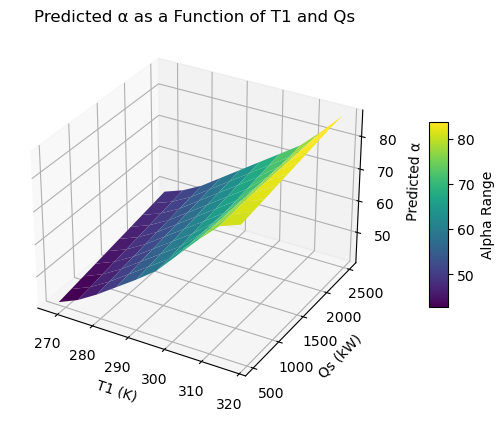

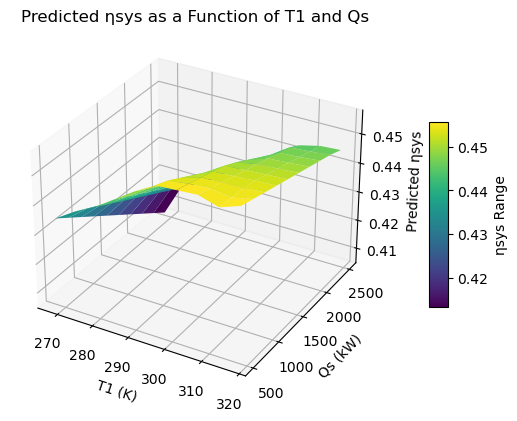

In [21]:
# Import library for 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a surface plot for alpha as a function of T1 and Qs
T1_grid, Qs_grid = np.meshgrid(T1_values, Qs_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(T1_grid, Qs_grid, almed*predicted_alpha, cmap='viridis')
ax.set_xlabel('T1 (K)')
ax.set_ylabel('Qs (kW)')
ax.set_zlabel('Predicted α')
plt.title('Predicted α as a Function of T1 and Qs')

# Add a color bar (range bar) for alpha
color_bar = plt.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
color_bar.set_label('Alpha Range')

plt.show()

# Create a surface plot for nsys as a function of T1 and Qs
T1_grid, Qs_grid = np.meshgrid(T1_values, Qs_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(T1_grid, Qs_grid, efmed*predicted_nsys, cmap='viridis')
ax.set_xlabel('T1 (K)')
ax.set_ylabel('Qs (kW)')
ax.set_zlabel('Predicted ηsys')
plt.title('Predicted ηsys as a Function of T1 and Qs')

# Add a color bar (range bar) for nsys
color_bar = plt.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
color_bar.set_label('ηsys Range')

plt.show()

## Saving Neural Network Trained Model for Task 2.3

In [22]:
model.save("model_bpnn_final.h5")

In [13]:
print(predicted_alpha*almed)

[[45.8025912  48.75119642 52.1021209  56.96624141 62.564063   68.1618773
  73.75969159 79.35751318 84.76448569 86.41749231]
 [46.30960246 49.21024011 52.56116459 57.01067123 62.60849282 68.20629982
  73.80411412 79.4019503  84.96412445 86.90712481]
 [46.81662832 49.6692838  53.02020099 57.05507916 62.65290075 68.25071505
  73.84853664 79.44635094 85.04418712 87.3967719 ]
 [47.32363229 50.12832749 53.47924103 57.09950533 62.69731598 68.29514487
  73.89295187 79.49077346 85.08859505 87.8864117 ]
 [47.83065084 50.58737483 53.93828472 57.28920921 62.74173851 68.3395601
  73.93737439 79.53518869 85.13301758 88.37605879]
 [48.33765846 51.04642217 54.39732842 57.74825655 62.78615374 68.38397533
  73.98179692 79.57961851 85.17741822 88.86569858]
 [48.84841901 51.50545856 54.85637575 58.20729294 62.83058356 68.42839056
  74.02620485 79.62402644 85.22184074 89.35535297]
 [49.36368747 51.96450955 55.31543039 58.66634028 62.87499149 68.47280579
  74.07063467 79.66844167 85.26627056 89.84497817]
 [